## Assignment 5.1

In [1]:
# lOad necessary libraries
from keras.datasets import imdb
import numpy as np
 
import matplotlib.pyplot as plt

In [2]:
#Loading the IMDB Dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
print(train_data[0],'\n\n----------', train_labels[0],'\n\n----------',test_data[0],'\n\n----------', test_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] 

---------- 1 

---------- [1, 591, 202, 14, 31, 6, 717, 10

In [4]:
train_labels[0]

1

In [5]:
# Test to see a review
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # Reverse the key (string), value(index)
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
# Encoding the integer sequences into a binary matrix

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
# sample train data
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
#Vectorize the label
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
# The model definition
#The Keras implementation
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
# Compiling the model
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [12]:
# Configuring the optimizer
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [13]:
# Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
# Training the model
#model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5231 - binary_accuracy: 0.7790 - val_loss: 0.4368 - val_binary_accuracy: 0.8140
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3163 - binary_accuracy: 0.9035 - val_loss: 0.3159 - val_binary_accuracy: 0.8819
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2298 - binary_accuracy: 0.9284 - val_loss: 0.2958 - val_binary_accuracy: 0.8833
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1813 - binary_accuracy: 0.9427 - val_loss: 0.2742 - val_binary_accuracy: 0.8907
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1484 - binary_accuracy: 0.9539 - val_loss: 0.2904 - val_binary_accuracy: 0.8852
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1205 - binary_accuracy: 0.9631 - val_loss: 0.3200 - val_binary_accuracy: 0.8749
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - los

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

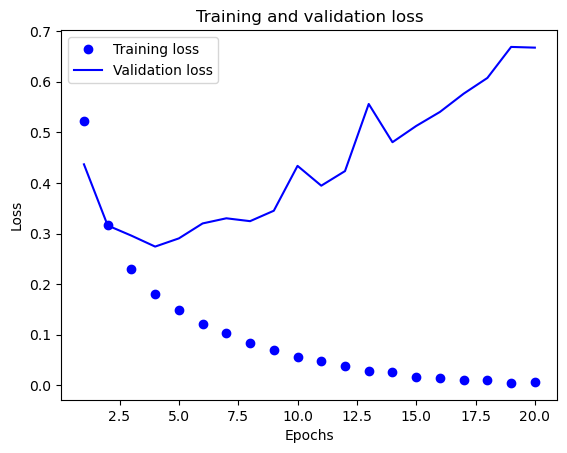

In [16]:
# Plotting training and validation loss
import matplotlib.pyplot as plt
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy'] 

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# "bo" for the "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b for the "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

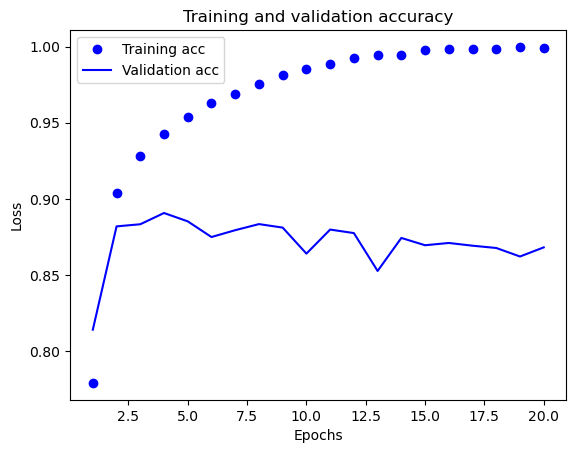

In [17]:
#  Plotting training and validation accuracy
plt.clf() # clear figure
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
#  Retraining a model from scratch
 
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

# Fit Model
model.fit(x_train, y_train, epochs=4, batch_size=512)
# Evaluate the model
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 7ms/step - loss: 0.4736 - accuracy: 0.8073
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2783 - accuracy: 0.9007
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2143 - accuracy: 0.9228
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2840 - accuracy: 0.8870


In [19]:
results = model.evaluate(x_test,y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.2840 - accuracy: 0.8870


Accuray around 88.6%

In [20]:
#  Using a trained network to generate predictions on new data
model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.201202  ],
       [0.9996977 ],
       [0.7996492 ],
       ...,
       [0.14773846],
       [0.08682977],
       [0.6919805 ]], dtype=float32)

## Assignment 5.2

In [21]:
 # Loading the Reuters dataset
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [22]:
# Decoding newswires back to text (for testing)
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [23]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [24]:
# Encoding the data
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

#Vectorizing training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [25]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
    
#Vectorizing training and test data
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [26]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [27]:
# Model definition
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [28]:
# Compiling the model
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [29]:
#  Setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [30]:
# Training the model
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 30ms/step - loss: 2.7009 - accuracy: 0.5088 - val_loss: 1.7623 - val_accuracy: 0.6290
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 1.4789 - accuracy: 0.6880 - val_loss: 1.3671 - val_accuracy: 0.7040
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 1.1348 - accuracy: 0.7583 - val_loss: 1.1865 - val_accuracy: 0.7340
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.9316 - accuracy: 0.8037 - val_loss: 1.0800 - val_accuracy: 0.7720
Epoch 5/20
16/16 [==============================] - 0s 18ms/step - loss: 0.7821 - accuracy: 0.8314 - val_loss: 1.0315 - val_accuracy: 0.7730
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.6572 - accuracy: 0.8543 - val_loss: 0.9645 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 0s 18ms/step - loss: 0.5506 - accuracy: 0.8809 - val_loss: 0.9346 - val_accuracy: 0.8030
Epoch 8/20
16

In [31]:
history.history

{'loss': [2.7009339332580566,
  1.4788738489151,
  1.1347589492797852,
  0.9315976500511169,
  0.7820711135864258,
  0.6572456955909729,
  0.5506003499031067,
  0.4682437479496002,
  0.39662355184555054,
  0.3373497724533081,
  0.2983768582344055,
  0.2558958828449249,
  0.2292533814907074,
  0.20509150624275208,
  0.18831995129585266,
  0.16919584572315216,
  0.16012796759605408,
  0.1539221554994583,
  0.14059589803218842,
  0.13959212601184845],
 'accuracy': [0.5087697505950928,
  0.6880481243133545,
  0.7583312392234802,
  0.8036832809448242,
  0.8313705921173096,
  0.8542971611022949,
  0.8808569312095642,
  0.8991481065750122,
  0.9155600070953369,
  0.9253320097923279,
  0.933725893497467,
  0.9431220293045044,
  0.9468804597854614,
  0.949636697769165,
  0.9520170092582703,
  0.9542720913887024,
  0.9551491141319275,
  0.9528940320014954,
  0.9576547145843506,
  0.9567777514457703],
 'val_loss': [1.7622895240783691,
  1.3671013116836548,
  1.1865359544754028,
  1.08000731468200

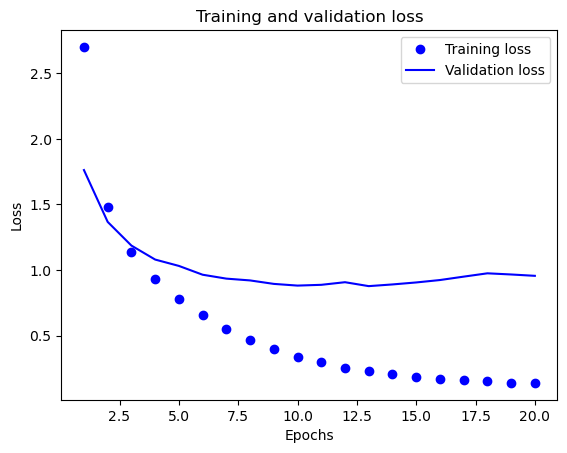

In [32]:
#  Plotting the training and validation loss

import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

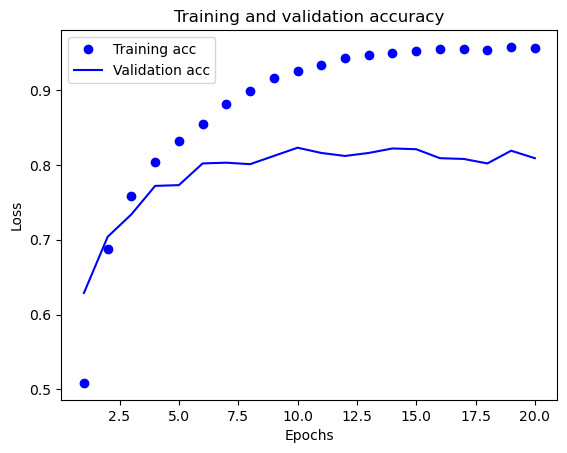

In [33]:
# Plotting the training and validation accuracy

plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [34]:
# Retraining a model from scratch

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 25ms/step - loss: 2.8159 - accuracy: 0.5040 - val_loss: 1.8757 - val_accuracy: 0.6360
Epoch 2/9
16/16 [==============================] - 0s 18ms/step - loss: 1.5573 - accuracy: 0.6891 - val_loss: 1.3694 - val_accuracy: 0.7020
Epoch 3/9
16/16 [==============================] - 0s 17ms/step - loss: 1.1739 - accuracy: 0.7511 - val_loss: 1.1751 - val_accuracy: 0.7440
Epoch 4/9
16/16 [==============================] - 0s 16ms/step - loss: 0.9544 - accuracy: 0.7990 - val_loss: 1.0680 - val_accuracy: 0.7720
Epoch 5/9
16/16 [==============================] - 0s 17ms/step - loss: 0.7945 - accuracy: 0.8358 - val_loss: 1.0015 - val_accuracy: 0.7770
Epoch 6/9
16/16 [==============================] - 0s 19ms/step - loss: 0.6646 - accuracy: 0.8601 - val_loss: 0.9728 - val_accuracy: 0.7970
Epoch 7/9
16/16 [==============================] - 0s 17ms/step - loss: 0.5595 - accuracy: 0.8800 - val_loss: 0.9014 - val_accuracy: 0.8110
Epoch 8/9
16/16 [===

In [35]:
results

[0.9991289973258972, 0.764915406703949]

Accuracy of around 78%

In [36]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18165627782724844

In [37]:
#  Generating predictions for new data
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [38]:
predictions[0].shape, np.sum(predictions[0]),  np.argmax(predictions[0])

((46,), 1.0000001, 4)

In [39]:
# Different way of handling lables and loss
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [40]:
model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy', #categorical_crossentropy, expects the labels to follow a categorical encoding. 
metrics=['acc'])

In [41]:
# A model with an information bottleneck
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 3.4378 - accuracy: 0.1531 - val_loss: 3.1022 - val_accuracy: 0.2330
Epoch 2/20
63/63 [==============================] - 1s 9ms/step - loss: 2.8414 - accuracy: 0.2303 - val_loss: 2.6608 - val_accuracy: 0.2480
Epoch 3/20
63/63 [==============================] - 1s 8ms/step - loss: 2.3632 - accuracy: 0.2623 - val_loss: 2.0956 - val_accuracy: 0.3100
Epoch 4/20
63/63 [==============================] - 1s 8ms/step - loss: 1.6963 - accuracy: 0.5733 - val_loss: 1.5737 - val_accuracy: 0.6000
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: 1.3920 - accuracy: 0.6320 - val_loss: 1.4764 - val_accuracy: 0.6190
Epoch 6/20
63/63 [==============================] - 1s 9ms/step - loss: 1.2708 - accuracy: 0.6600 - val_loss: 1.4493 - val_accuracy: 0.6290
Epoch 7/20
63/63 [==============================] - 1s 8ms/step - loss: 1.1873 - accuracy: 0.6907 - val_loss: 1.4511 - val_accuracy: 0.6460
Epoch 8/20
63/63 [=

## Assignment 5.3

In [42]:
# Loading the Boston housing dataset

from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [43]:
# Normalizing the data

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [44]:
#  Model definition
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [45]:
# K-fold validation

import numpy as np
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition #k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    #Evaluates the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [46]:
all_scores

[2.101060628890991, 2.39310359954834, 2.691499710083008, 2.4688401222229004]

In [47]:
np.mean(all_scores)

2.41362601518631

In [48]:
from keras import backend as K
# Some memory clean-up
K.clear_session()

In [49]:
# Saving the validation logs at each fold

num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0) 
    mae_history = history.history['mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [50]:
#  Building the history of successive mean K-fold validation scores
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

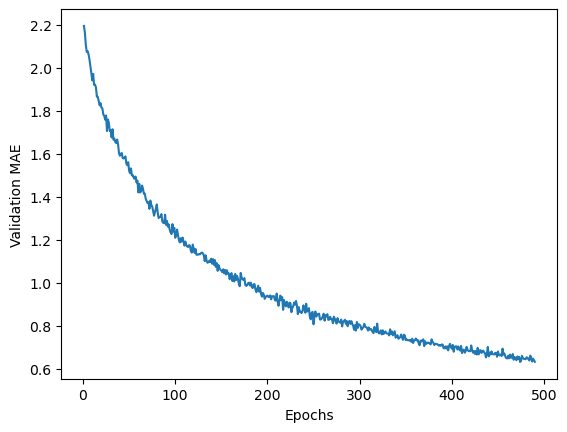

In [51]:
# Plotting validation scores
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history[10:]) + 1), average_mae_history[10:])
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

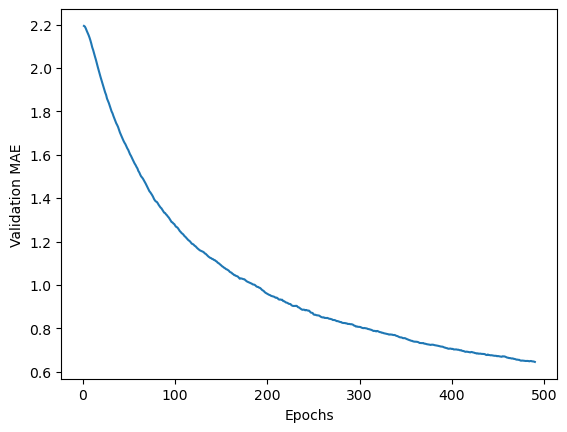

In [52]:
# Plotting validation scores, excluding the first 10 data points
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [53]:
# Training the final model

model = build_model()
model.fit(train_data, train_targets,
epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 18.6953 - mae: 2.6824


In [54]:
test_mae_score

2.682408571243286

In [55]:
#Generating predictions on new data
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 2ms/step


array([8.047043], dtype=float32)